In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import xarray as xr
import gsw

In [3]:
import sys
sys.path.append('../training-on-CM2.6/')
from helpers.cm26 import DatasetCM26

In [4]:
test = DatasetCM26(source='3d-validate')

In [5]:
test.data

<xarray.Dataset> Size: 70GB
Dimensions:  (time: 12, zl: 50, yh: 2700, xq: 3600, yq: 2700, xh: 3600)
Coordinates:
  * yh       (yh) float64 22kB -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
  * xq       (xq) float64 29kB -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * zl       (zl) float64 400B 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * xh       (xh) float64 29kB -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yq       (yq) float64 22kB -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
  * time     (time) object 96B 0194-01-13 12:00:00 ... 0194-12-14 12:00:00
Data variables:
    u        (time, zl, yh, xq) float32 23GB dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>
    v        (time, zl, yq, xh) float32 23GB dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>
    rho      (time, zl, yh, xh) float32 23GB dask.array<chunksize=(1, 1, 2700, 3600), meta=np.ndarray>

In [6]:
ds_coarse, Fx_hires, Fy_hires, Fx_filtered_tendency, Fy_filtered_tendency, Fx_filtered_state, Fy_filtered_state, Fx, Fy  = test.compute_subfilter_forcing(debug=True)

In [7]:
Fx_c = Fx.isel(time=0, zl=0).compute()

In [11]:
test.data.isel(time=0,zl=0)

<xarray.Dataset> Size: 117MB
Dimensions:  (yh: 2700, xq: 3600, yq: 2700, xh: 3600)
Coordinates:
  * yh       (yh) float64 22kB -81.11 -81.07 -81.02 -80.98 ... 89.89 89.94 89.98
  * xq       (xq) float64 29kB -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
    zl       float64 8B 5.034
  * xh       (xh) float64 29kB -279.9 -279.8 -279.7 -279.6 ... 79.75 79.85 79.95
  * yq       (yq) float64 22kB -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
    time     object 8B 0194-01-13 12:00:00
Data variables:
    u        (yh, xq) float32 39MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    v        (yq, xh) float32 39MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    rho      (yh, xh) float32 39MB dask.array<chunksize=(2700, 3600), meta=np.ndarray>

In [27]:
ds = xr.open_dataset('test_rho_fluxes.nc')

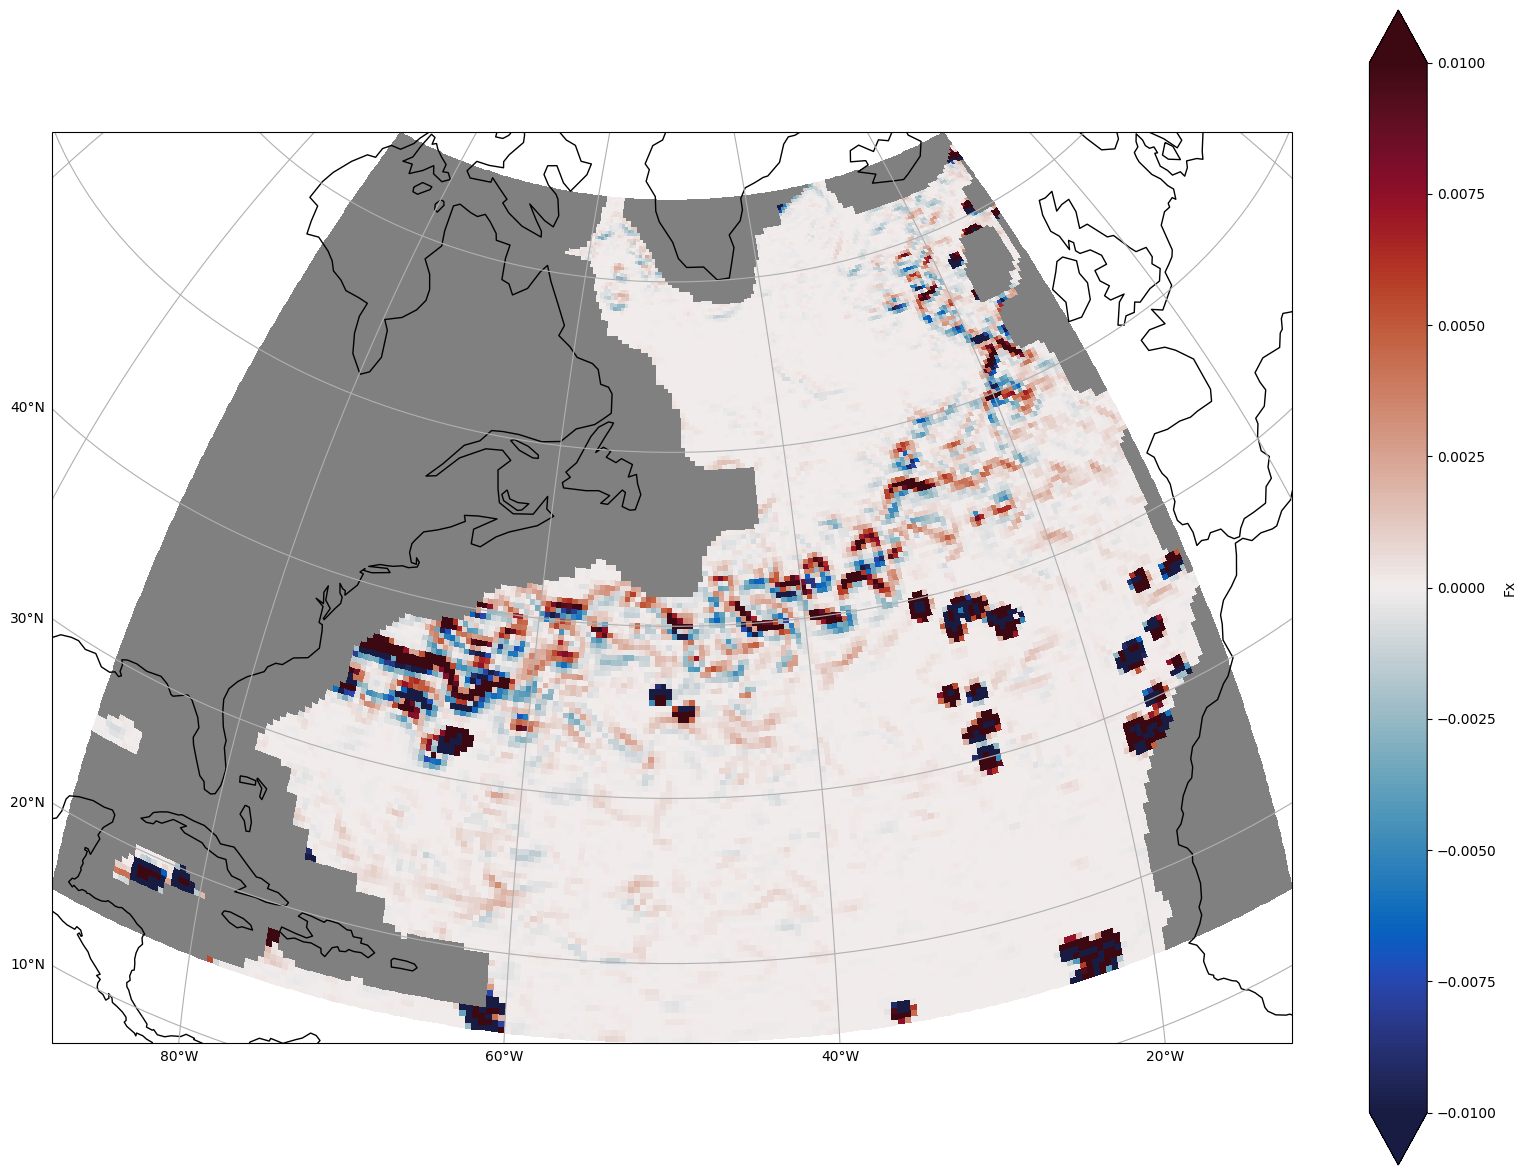

In [29]:
from helpers.selectors import *
plot(ds_coarse.select2d(zl=20).nanvar(ds.Fx,4), vmin=-0.01, vmax=0.01)

In [ ]:
|